**IMPORTING REQUIRED LIBRARIES**

In [0]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import keras
import keras as k
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import optimizers
from keras.layers import Dense, Dropout, Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,ZeroPadding2D, MaxPooling2D
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import seaborn as sns
from keras.utils import to_categorical
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Using TensorFlow backend.


In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1lnve5jM6MmKv7MelXE4aNK_qAtu2ikF3'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1lnve5jM6MmKv7MelXE4aNK_qAtu2ikF3


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
df3 = pd.read_json('Filename.csv')

**SAMPLE DISPLAY OF DOCUMENT**

In [0]:
df3.head()

,sentiment,text
0,positive,"Thank you, Ellen. We have a strong 2018, with ..."
1,positive,Stock-based compensation totaled $2.3 billion....
10,negative,"For the full-year 2018, Other Bets revenues we..."
100,neutral,Great. Thank you. I just wanted to follow up o...
1000,negative,I have made it a priority to join Mike and Reb...


**CONVERTING SENTIMENT CATEGORICAL LABELS TO NUMERICAL**

Negative: 0

Positive: 1

Neutral: 2


In [0]:
# Convert sentiments into 0,1,2
sent = {'positive': 1,'negative': 0,'neutral': 2} 
df3.sentiment = [sent[item] for item in df3.sentiment] 

**CLEANING WORDS BY REMOVING UNNECESARY ELEMENTS**

In [0]:
def review_to_words( raw_review ):
    # Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", raw_review) 
    
    #Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    
    # Removing stop words
    stops = set(stopwords.words("english"))                  
    
    meaningful_words = [w for w in words if not w in stops]   
    
    return( " ".join( meaningful_words )) 

In [0]:
# Get the number of reviews based on the dataframe column size
num_reviews = 1649

# Initialize an empty list to hold the clean reviews
clean_train_reviews = []

# Loop over each review; create an index i that goes from 0 to the length
# of the movie review list 
for i in range( 0, num_reviews ):
    # Call function for each one, and add the result to the list of
    # clean reviews
    clean_train_reviews.append( review_to_words( df3["text"][i] ) )

**CREATING BAG OF WORDS**

In [0]:
print ("Creating the bag of words...\n")
# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 500) 

train_data_features = vectorizer.fit_transform(clean_train_reviews)

train_data_features = train_data_features.toarray()

print (train_data_features.shape)

Creating the bag of words...

(1649, 500)


**SPLIT DATA INTO TRAIN AND TEST WITH 80:20 RATIO**

In [0]:

x_train, x_val, y_train, y_val = train_test_split(train_data_features, df3['sentiment'], test_size = 0.20, random_state = 0)

In [0]:
y_train[0].shape

(3,)

In [0]:
y_val = keras.utils.to_categorical(y_val , num_classes=None, dtype='float32')
y_train = keras.utils.to_categorical(y_train , num_classes=None, dtype='float32')
n = x_val.shape[1]
print(y_val.shape)
print(y_train.shape)

(330, 3)
(1319, 3)


**MODEL CREATION**

In [0]:
bs = 128

# define network
model = Sequential()
model.add(Dense(100, input_shape=(n,), activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(100,activation='relu'))
model.add(Dropout(.3))
model.add(Dense(3, activation='softmax'))

# compile network
#opt = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
opt = k.optimizers.rmsprop(lr=0.0001, decay=1e-6)
#opt = k.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer = opt, metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_val,y_val),epochs=50,batch_size = bs, verbose=2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 1319 samples, validate on 330 samples
Epoch 1/50
 - 1s - loss: 1.0528 - acc: 0.4344 - val_loss: 1.0224 - val_acc: 0.5303
Epoch 2/50
 - 0s - loss: 0.9992 - acc: 0.4579 - val_loss: 0.9897 - val_acc: 0.5364
Epoch 3/50
 - 0s - loss: 0.9854 - acc: 0.4807 - val_loss: 0.9750 - val_acc: 0.5364
Epoch 4/50
 - 0s - loss: 0.9728 - acc: 0.4936 - val_loss: 0.9650 - val_acc: 0.5364
Epoch 5/50
 - 0s - loss: 0.9720 - acc: 0.4655 - val_loss: 0.9584 - val_acc: 0.5364
Epoch 6/50
 - 0s - loss: 0.9651 - acc: 0.4792 - val_loss: 0.9545 - val_acc: 0.5364
Epoch 7/50
 - 0s - loss: 0.9692 - acc: 0.4655 - val_loss: 0.9526 - val_acc: 0.5364
Epoch 8/50
 - 0s - loss: 0.9629 - acc: 0.4632 - val_loss: 0.9502 - val_acc: 0.5364
Epoch 9/50
 - 0s - loss: 0.9588 - acc: 0.4792 - val_lo

**MODEL PERFORMANCE**

In [0]:
acc = model.evaluate(x_val, y_val, verbose=1)
print('Test data loss:', acc[0] )
print('Test data accuracy:', acc[1] * 100)

330/330 [==============================] - 0s 108us/step
Test data loss: 0.9501315030184659
Test data accuracy: 52.42424242424243


**VISUALIZING MODEL ACCURACY**

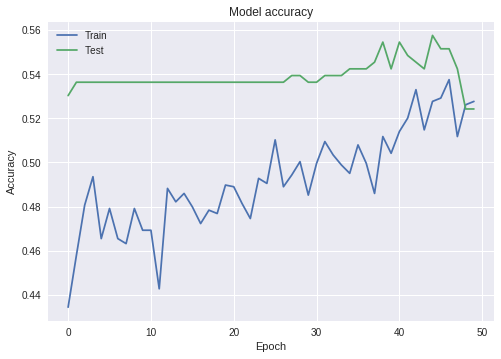

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**VISUALIZING MODEL LOSS**

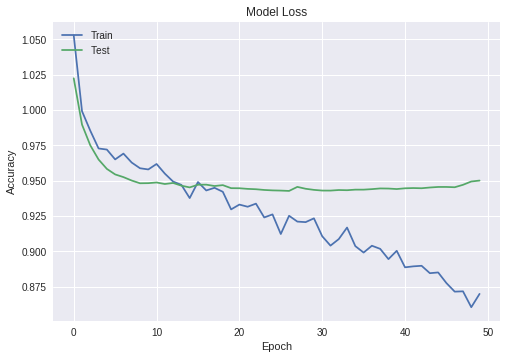

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


**VISUALIZING MODEL PERFORMANCE ON TEST DATA WITH CONFUSION MATRIX**

In [0]:
predicted = model.predict(x_val)

In [0]:
for i in range(0,len(predicted)):
  y = predicted[i]
  max = np.argmax(y)
  min = np.argmin(y)
  for x in range(0,2):
    y[max]=1
    y[min]=0
    if y[x]!=0 and y[x]!=1:
      y[x]=0

In [0]:
cm = confusion_matrix(y_val.argmax(axis=1), predicted.argmax(axis =1)) 
print('Confusion Matrix :')
print(cm) 

Confusion Matrix :
[[  0  10  24]
 [  0  39  80]
 [  0  43 134]]


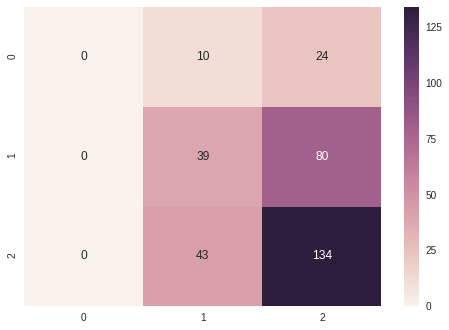

In [0]:
sns.heatmap(cm, annot=True, fmt="d")